<a href="https://colab.research.google.com/github/venusinfire/SenalesySistemas2023-2/blob/main/3_SerieyTransformadaFourier/Copia_de_Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejercicio 2.4**

#Aplicación en circuitos electricos - potencia

* La distorsión armónica total (THD) es una medida que indica qué parte de la distorsión de un voltaje o corriente se debe a armónicos en la señal.
El THD es un aspecto importante en los sistemas de audio, comunicaciones y energía y normalmente, aunque no siempre, debe ser lo más bajo posible.

* El factor de distorsión es una medida del alejamiento de la forma de onda de salida con
respecto a otra con forma de onda senoidal pura, que corresponde a su componente
fundamental. Este factor de distorsión, normalmente se expresa en porcentaje, siendo del
100% en el caso ideal.

* El Distorsión Armónica Total (THD, por sus siglas en inglés) se puede calcular a partir de los resultados de una Transformada Rápida de Fourier (FFT) de una señal. Aquí hay una descripción general de los pasos para calcular el THD desde la FFT:

#1. Adquirir la señal:

* Primero, se adquiere la señal de interés que deseas analizar.

#2. Preprocesar la señal:

* Hay que asegurarse de que la señal esté en el formato adecuado y que tenga un número de muestras que sea una potencia de 2 para facilitar el cálculo de la FFT.

#3. Calcular la FFT:

* Aplique la FFT a la señal para obtener el espectro de frecuencia. La FFT descompone la señal en sus componentes de frecuencia.

#4. Identificar las componentes armónicas:

* Se analiza el espectro de frecuencia para identificar las componentes armónicas. Las componentes armónicas son los picos en el espectro que representan las frecuencias fundamentales y sus armónicos.

#5. Calcular la energía total:

* Se suma la energía de todas las componentes armónicas y la componente de frecuencia fundamental.

#6. Calcular la energía de las armónicas:

* Se suma la energía de todas las componentes armónicas, excluyendo la componente de frecuencia fundamental.

#7. Calcular el THD:

* Se utiliza la fórmula del THD, que se define como la raíz cuadrada de la suma de las energías de las armónicas dividida por la energía total. La fórmula es la siguiente:

\begin{equation}
THD= \frac{\sqrt{Energíadelasarmonicas}}{Energía total}
\end{equation}

Donde la energía se puede calcular sumando los cuadrados de las amplitudes de las componentes de frecuencia.

# 8. Expresar el THD como un porcentaje:

* A menudo, el resultado se multiplica por 100 para expresar el THD como un porcentaje.

* El factor de distorsion en base al THD se puede calcular como:

\begin{equation}
THD= \frac{V1}{(\sum_{n=1}^{∞} V_n^{2})^\frac{1}{2}}
\end{equation}

\begin{equation}
THD= (\frac{1}{(1+THD)^{2}})^{\frac{1}{2}}
\end{equation}






#**Ejemplo ilustrativo**

* Vamos a considerar un ejemplo simple de un rectificador de onda completa con carga resistiva y analizaremos el THD y el factor de distorsión de potencia (PFD). Supongamos que tenemos un rectificador de onda completa con una carga resistiva de R= 10 $\Omega$ y una fuente de alimentación de Vrms = 120 [V] y f = 60 [Hz]

#**Paso 1: Generar la señal de entrada**

Generemos la señal de entrada del rectificador de onda completa. En este caso, estamos considerando una onda sinusoidal de 60 Hz

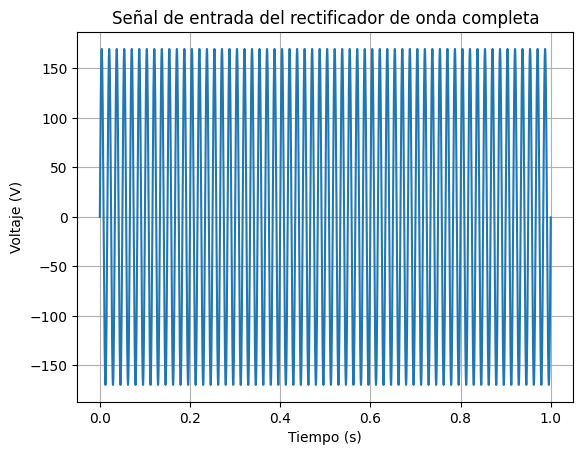

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
frecuencia = 60  # Hz
voltaje_rms = 120  # V
resistencia_carga = 10  # Ohm

# Generar señal de entrada (onda sinusoidal)
t = np.arange(0, 1, 1 / (2 * frecuencia * 1000))  # 2 ciclos de la onda
entrada = voltaje_rms * np.sqrt(2) * np.sin(2 * np.pi * frecuencia * t)

# Graficar la señal de entrada
plt.plot(t, entrada)
plt.title('Señal de entrada del rectificador de onda completa')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()


#**Paso 2: Rectificación de onda completa**
Ahora, aplicaremos la rectificación de onda completa a la señal de entrada para obtener la señal rectificada.

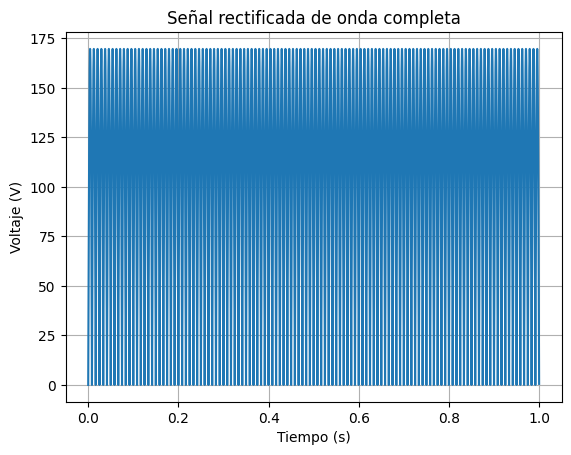

In [ ]:
# Rectificación de onda completa
rectificado = np.abs(entrada)

# Graficar la señal rectificada
plt.plot(t, rectificado)
plt.title('Señal rectificada de onda completa')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()


#**Paso 3: Calcular el THD y el PFD**

In [ ]:
from scipy.fft import fft

# Calcular la FFT de la señal rectificada
fft_result = fft(rectificado)

# Calcular el THD
fundamental = fft_result[1]
armónicos = np.delete(fft_result, 1)  # Excluir la componente fundamental
energia_fundamental = np.abs(fundamental)**2
energia_armónicos = np.sum(np.abs(armónicos)**2)
thd = np.sqrt(energia_armónicos) / np.sqrt(energia_fundamental)

# Calcular el factor de distorsión de potencia (PFD)
pfd = thd / np.sqrt(1 + thd**2)

# Imprimir resultados
print(f'THD: {thd * 100:.2f}%')
print(f'Factor de distorsión de potencia (PFD): {pfd:.4f}')


THD: 1672685258254522880.00%
Factor de distorsión de potencia (PFD): 1.0000


Para un circuito rectificador de onda completa con una carga RC en serie, la corriente y el voltaje en el circuito pueden tener formas de onda más complejas debido al comportamiento reactivo del condensador. Vamos a considerar un ejemplo donde se tiene un circuito rectificador de onda completa con una carga RC en serie. Supongamos que tenemos los siguientes parámetros:

R= 10 $\Omega$

C= 100 uF

fuente de alimentación de Vrms = 120 [V] y f = 60 [Hz]

Primero, generaremos la señal de entrada del rectificador de onda completa, luego aplicaremos la rectificación y finalmente calcularemos el THD y el factor de distorsión de potencia (PFD).

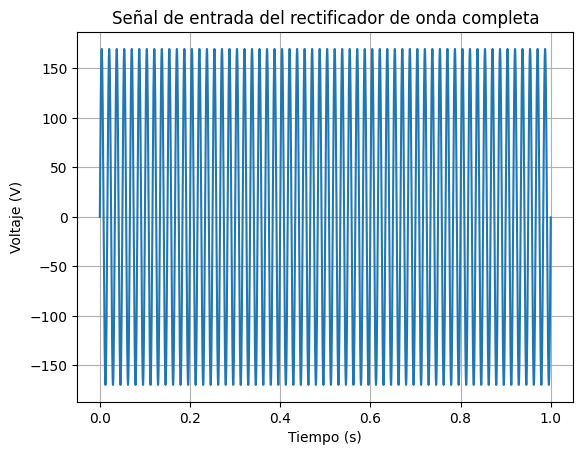

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Parámetros
frecuencia = 60  # Hz
voltaje_rms = 120  # V
resistencia_carga = 10  # Ohm
capacitancia = 100e-6  # F

# Generar señal de entrada (onda sinusoidal)
t = np.arange(0, 1, 1 / (2 * frecuencia * 1000))  # 2 ciclos de la onda
entrada = voltaje_rms * np.sqrt(2) * np.sin(2 * np.pi * frecuencia * t)

# Graficar la señal de entrada
plt.plot(t, entrada)
plt.title('Señal de entrada del rectificador de onda completa')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()


A continuación, aplicaremos la rectificación de onda completa y el filtrado mediante el circuito RC.

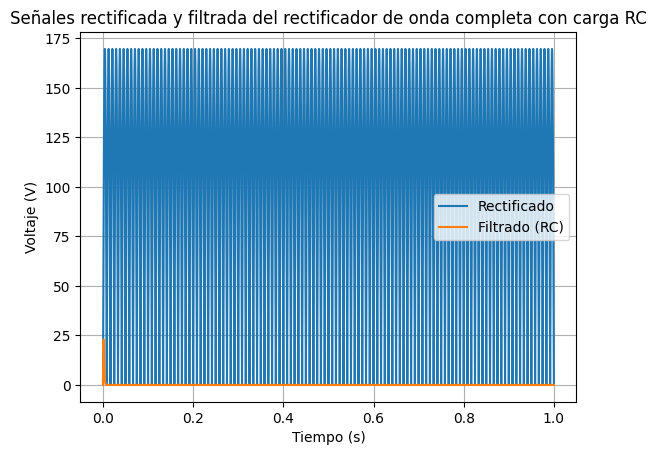

In [ ]:
# Rectificación de onda completa
rectificado = np.abs(entrada)

# Filtrado mediante circuito RC
tiempo_carga = resistencia_carga * capacitancia
t_RC = np.arange(0, 1, 1 / (2 * frecuencia * 1000))
salida_filtrada = rectificado * np.exp(-t_RC / tiempo_carga)

# Graficar la señal rectificada y filtrada
plt.plot(t, rectificado, label='Rectificado')
plt.plot(t_RC, salida_filtrada, label='Filtrado (RC)')
plt.title('Señales rectificada y filtrada del rectificador de onda completa con carga RC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.legend()
plt.grid(True)
plt.show()


Finalmente, calcularemos el THD y el PFD.

In [ ]:
# Calcular la FFT de la señal filtrada
fft_result = fft(salida_filtrada)

# Calcular el THD
fundamental = fft_result[1]
armónicos = np.delete(fft_result, 1)  # Excluir la componente fundamental
energia_fundamental = np.abs(fundamental)**2
energia_armónicos = np.sum(np.abs(armónicos)**2)
thd = np.sqrt(energia_armónicos) / np.sqrt(energia_fundamental)

# Calcular el factor de distorsión de potencia (PFD)
pfd = thd / np.sqrt(1 + thd**2)

# Imprimir resultados
print(f'THD: {thd * 100:.2f}%')
print(f'Factor de distorsión de potencia (PFD): {pfd:.4f}')


THD: 1686.05%
Factor de distorsión de potencia (PFD): 0.9982


#**2.5 Aplicación en comunicaciones - modulación AM**

La Modulación de Amplitud con Detección Coherente (MADC) es una técnica de modulación que se utiliza para transmitir información a través de una señal portadora modulada en amplitud. La detección coherente implica que el receptor tiene información sobre la fase de la portadora original, lo que permite una demodulación más precisa. Aquí hay una descripción de sus componentes y aplicaciones:

#**Componentes de la Modulación por Amplitud con Detección Coherente:**

#**1. Modulación de Amplitud (AM):**

La señal de información se mezcla con una señal portadora de mayor frecuencia, alterando la amplitud de la portadora para representar la información. La ecuación de la señal modulada AM es

\begin{equation}
s(t)= A_c[1+m*cos(2\pi f_mt)]*cos(2\pi f_ct)
\end{equation}

donde $A_c$ es la amplitud de la portadora, m es el indice de modulación, $f_m$ es la frecuencia de la señal de información y $f_c$ es la frecuencia de la portadora

#**2 Detección coherente**

En la detección coherente, el receptor tiene información precisa sobre la fase de la portadora original. Esto implica que el receptor sincroniza su oscilador local con la fase de la portadora recibida. La detección coherente permite una recuperación más precisa de la señal de información.

# **Aplicaciones de la Modulación por Amplitud con Detección Coherente:**

# **1. Radiodifusión AM de Alta Calidad:**

* a MADC se utiliza en emisoras de radio AM que buscan proporcionar una calidad de audio mejorada. La detección coherente ayuda a reducir la distorsión y el ruido, lo que mejora la fidelidad de la transmisión.

#**2. Comunicaciones de Larga Distancia:**

* En aplicaciones de comunicaciones de largo alcance, donde la calidad de la señal es crucial, la detección coherente puede ser beneficiosa para mitigar los efectos de la atenuación y el ruido en el canal de transmisión.

#**3. Sistemas de Comunicación de Banda Lateral Única (BLU):**

* La MADC se utiliza en sistemas de comunicación BLU para transmitir voz y datos. Al proporcionar una demodulación más precisa, se mejora la calidad de la señal y se reduce la susceptibilidad a interferencias.

#**4. Sistemas de Navegación por Radiofrecuencia:**

* En sistemas de navegación basados en radiofrecuencia, como LORAN (Long Range Navigation), la MADC puede ser utilizada para mejorar la precisión de la transmisión de información de posición.

#**Sistemas de Comunicación Militar:**

* En aplicaciones militares, donde la seguridad y la confiabilidad son críticas, la MADC puede ser preferida para mantener la integridad de la señal en entornos desafiantes.

La detección coherente en la MADC puede ser más compleja y costosa que otros métodos de detección, pero proporciona beneficios significativos en términos de calidad de señal y resistencia al ruido. Su elección dependerá de los requisitos específicos de la aplicación y de la importancia de la calidad de la señal.

#**Ejemplo ilustrativo de la modulación por amplitud con detección coherente (MADC)**



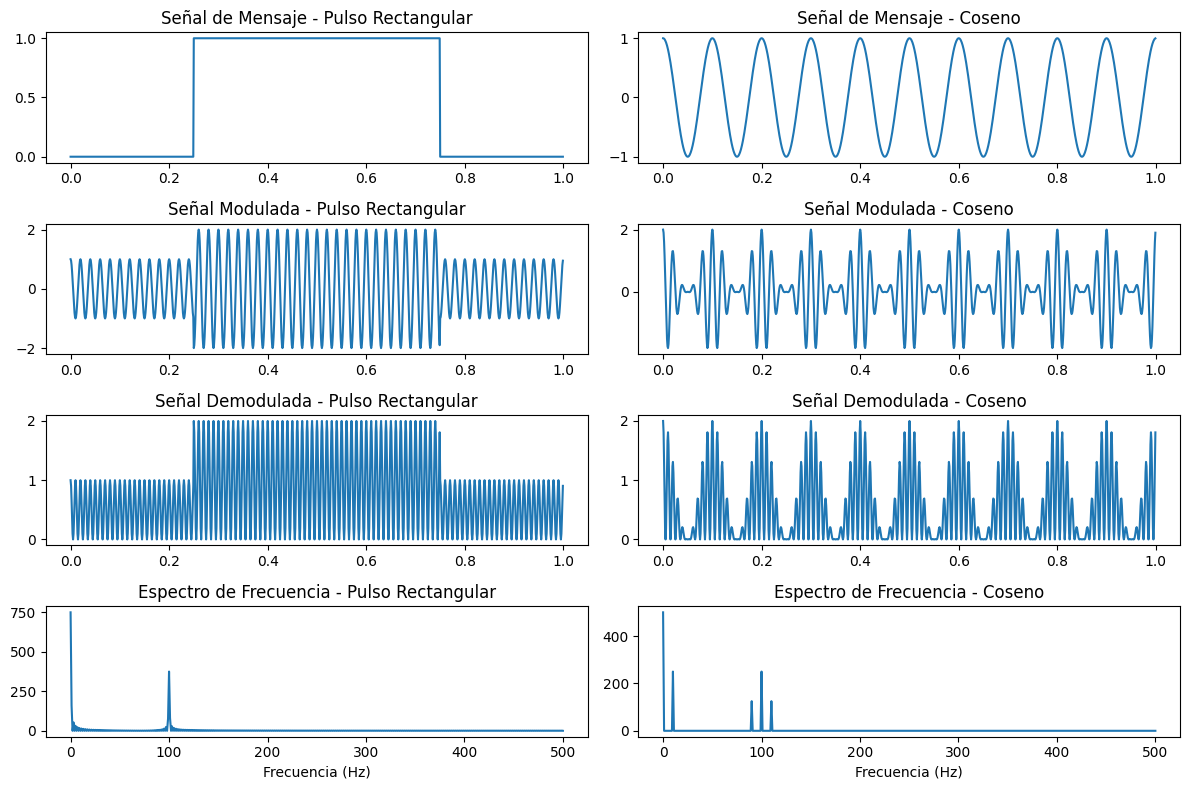

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales
t_muestreo = 0.001  # Tiempo de muestreo
t = np.arange(0, 1, t_muestreo)  # Vector de tiempo

# Frecuencias de la señal de mensaje
fm_rectangular = 5.0  # Frecuencia del pulso rectangular en Hz
fm_coseno = 10.0      # Frecuencia de la señal tipo coseno en Hz

# Señales de mensaje
mensaje_rectangular = np.zeros_like(t)
mensaje_rectangular[int(len(t)/4):int(3*len(t)/4)] = 1.0  # Pulso rectangular

mensaje_coseno = np.cos(2 * np.pi * fm_coseno * t)  # Señal tipo coseno

# Señales moduladas en amplitud (AM)
Ac = 1.0  # Amplitud de la portadora
fc = 50.0  # Frecuencia de la portadora en Hz

portadora = Ac * np.cos(2 * np.pi * fc * t)

señal_modulada_rectangular = (1 + mensaje_rectangular) * portadora
señal_modulada_coseno = (1 + mensaje_coseno) * portadora

# Detección coherente
señal_demodulada_rectangular = señal_modulada_rectangular * portadora
señal_demodulada_coseno = señal_modulada_coseno * portadora

# Transformada Rápida de Fourier (FFT)
frecuencia = np.fft.rfftfreq(len(t), t_muestreo)
fft_rectangular = np.fft.rfft(señal_demodulada_rectangular)
fft_coseno = np.fft.rfft(señal_demodulada_coseno)

# Visualización en el dominio del tiempo
plt.figure(figsize=(12, 8))

plt.subplot(4, 2, 1)
plt.plot(t, mensaje_rectangular)
plt.title('Señal de Mensaje - Pulso Rectangular')

plt.subplot(4, 2, 2)
plt.plot(t, mensaje_coseno)
plt.title('Señal de Mensaje - Coseno')

plt.subplot(4, 2, 3)
plt.plot(t, señal_modulada_rectangular)
plt.title('Señal Modulada - Pulso Rectangular')

plt.subplot(4, 2, 4)
plt.plot(t, señal_modulada_coseno)
plt.title('Señal Modulada - Coseno')

plt.subplot(4, 2, 5)
plt.plot(t, señal_demodulada_rectangular)
plt.title('Señal Demodulada - Pulso Rectangular')

plt.subplot(4, 2, 6)
plt.plot(t, señal_demodulada_coseno)
plt.title('Señal Demodulada - Coseno')

# Visualización en el dominio de la frecuencia
plt.subplot(4, 2, 7)
plt.plot(frecuencia, np.abs(fft_rectangular))
plt.title('Espectro de Frecuencia - Pulso Rectangular')
plt.xlabel('Frecuencia (Hz)')

plt.subplot(4, 2, 8)
plt.plot(frecuencia, np.abs(fft_coseno))
plt.title('Espectro de Frecuencia - Coseno')
plt.xlabel('Frecuencia (Hz)')

plt.tight_layout()
plt.show()
